In [1]:
!wget https://www.dropbox.com/s/0vyzjcqsdl6cqi2/state-farm-distracted-driver-detection.zip

--2021-01-03 06:15:02--  https://www.dropbox.com/s/0vyzjcqsdl6cqi2/state-farm-distracted-driver-detection.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/0vyzjcqsdl6cqi2/state-farm-distracted-driver-detection.zip [following]
--2021-01-03 06:15:02--  https://www.dropbox.com/s/raw/0vyzjcqsdl6cqi2/state-farm-distracted-driver-detection.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc00e502ab3c8dc975b3d7e44418.dl.dropboxusercontent.com/cd/0/inline/BGSGlSPuBBC6Z-bKzB1lzK83OcqactwHSBLVbMrq43A9uaxmSOAwXlFQMqvZ0_bTp4coO-xLo5OVeIkMzmHiLlkXQzu_M_zua6uFwjwRpstRcw/file# [following]
--2021-01-03 06:15:02--  https://uc00e502ab3c8dc975b3d7e44418.dl.dropboxusercontent.com/cd/0/inline/BGSGlSPuBBC6Z-bKzB1lzK83OcqactwHSBLVbMrq43

In [2]:
!unzip '/content/state-farm-distracted-driver-detection.zip'

Archive:  /content/state-farm-distracted-driver-detection.zip
  inflating: sample_submission.csv   
  inflating: driver_imgs_list.csv    
  inflating: imgs.zip                


In [3]:
!unzip '/content/imgs.zip'

Streaming output truncated to the last 5000 lines.
  inflating: train/c7/img_56661.jpg  
  inflating: train/c7/img_56699.jpg  
  inflating: train/c7/img_56717.jpg  
  inflating: train/c7/img_56724.jpg  
  inflating: train/c7/img_56768.jpg  
  inflating: train/c7/img_56779.jpg  
  inflating: train/c7/img_56849.jpg  
  inflating: train/c7/img_56899.jpg  
  inflating: train/c7/img_56938.jpg  
  inflating: train/c7/img_5706.jpg   
  inflating: train/c7/img_57076.jpg  
  inflating: train/c7/img_57122.jpg  
  inflating: train/c7/img_57137.jpg  
  inflating: train/c7/img_5715.jpg   
  inflating: train/c7/img_57278.jpg  
  inflating: train/c7/img_57321.jpg  
  inflating: train/c7/img_57345.jpg  
  inflating: train/c7/img_57355.jpg  
  inflating: train/c7/img_5741.jpg   
  inflating: train/c7/img_57433.jpg  
  inflating: train/c7/img_5753.jpg   
  inflating: train/c7/img_57559.jpg  
  inflating: train/c7/img_57594.jpg  
  inflating: train/c7/img_5771.jpg   
  inflating: train/c7/img_57712.jpg  

In [1]:
import tensorflow as tf 

if tf.test.gpu_device_name(): 
    

    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))

else:

    print("Please install GPU version of TF")

Default GPU Device:/device:GPU:0


In [2]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [5]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [4]:
%mkdir Test

mkdir: cannot create directory ‘Test’: File exists


In [5]:
!mv /content/test/  /content/Test

mv: cannot stat '/content/test/': No such file or directory


In [6]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = './train'
valid_path = './Test'


In [26]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [27]:
# don't train existing weights
for layer in vgg16.layers:
    layer.trainable = False

In [28]:
  # useful for getting number of output classes
folders = glob('./train/*')

In [29]:
folders

['./train/c7',
 './train/c3',
 './train/c8',
 './train/c1',
 './train/c2',
 './train/c9',
 './train/c4',
 './train/c6',
 './train/c5',
 './train/c0']

In [30]:
# our layers - you can add more if you want
x = Flatten()(vgg16.output)

In [31]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg16.input, outputs=prediction)

In [32]:

# view the structure of the model
model.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [33]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [7]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [8]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('./train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 22424 images belonging to 10 classes.


In [9]:
test_set = test_datagen.flow_from_directory('./Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 79726 images belonging to 1 classes.


701

In [37]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
701/701 [==============================] - 924s 1s/step - loss: 0.9641 - accuracy: 0.7199 - val_loss: 66.2854 - val_accuracy: 0.1329
Epoch 2/5
701/701 [==============================] - 829s 1s/step - loss: 0.1175 - accuracy: 0.9666 - val_loss: 80.5268 - val_accuracy: 0.1140
Epoch 3/5
701/701 [==============================] - 793s 1s/step - loss: 0.0827 - accuracy: 0.9759 - val_loss: 94.8662 - val_accuracy: 0.0717
Epoch 4/5
701/701 [==============================] - 790s 1s/step - loss: 0.0833 - accuracy: 0.9738 - val_loss: 110.5751 - val_accuracy: 0.1381
Epoch 5/5
701/701 [==============================] - 784s 1s/step - loss: 0.0782 - accuracy: 0.9755 - val_loss: 122.2168 - val_accuracy: 0.0655


In [38]:

from tensorflow.keras.models import load_model

model.save('model_DDC_Final.h5')

In [10]:
from tensorflow.keras.models import load_model
 
# load model
model = load_model('model_DDC_Final.h5')

In [11]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [12]:

# Part 4 - Making a single prediction

import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('./Test/test/img_1.jpg', target_size = (224,224))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)

In [13]:
result

array([[5.2220514e-04, 7.0930815e-05, 8.5998029e-02, 2.4110139e-03,
        4.6880841e-02, 7.5772291e-01, 8.4004924e-02, 3.1008383e-03,
        2.3400283e-04, 1.9054364e-02]], dtype=float32)

In [14]:
Classes = {"c0": "safe driving", "c1": "texting - right", "c2": "talking on the phone - right", "c3": "texting - left",
           "c4": "talking on the phone - left", "c5": "operating the radio", "c6": "drinking", "c7": "reaching behind",
           "c8": "hair and makeup", "c9": " talking to passenger"}

In [15]:
import matplotlib.pyplot as plt


In [16]:
import os

In [17]:
from tensorflow.keras.preprocessing import image
# labels is the image array
test_image = []
i = 0

files = os.listdir('/content/Test/test')
nums = np.random.randint(low=1, high=len(files), size=20)
for i in range(20):
    
    img = image.load_img('/content/Test/test/'+files[nums[i]],
                         target_size =(224,224))
    
    img = image.img_to_array(img)
    img = img.reshape((-1,224,224,3))
    img = img/255
    img = np.expand_dims(img, axis = 0)
    test_image.append(img)
    

In [18]:
test = []

for img in test_image:
    test.append(img)


In [19]:
len(test)

20

In [20]:
test = np.array(test).reshape(-1,224,224,3)


In [21]:
prediction = model.predict(test)

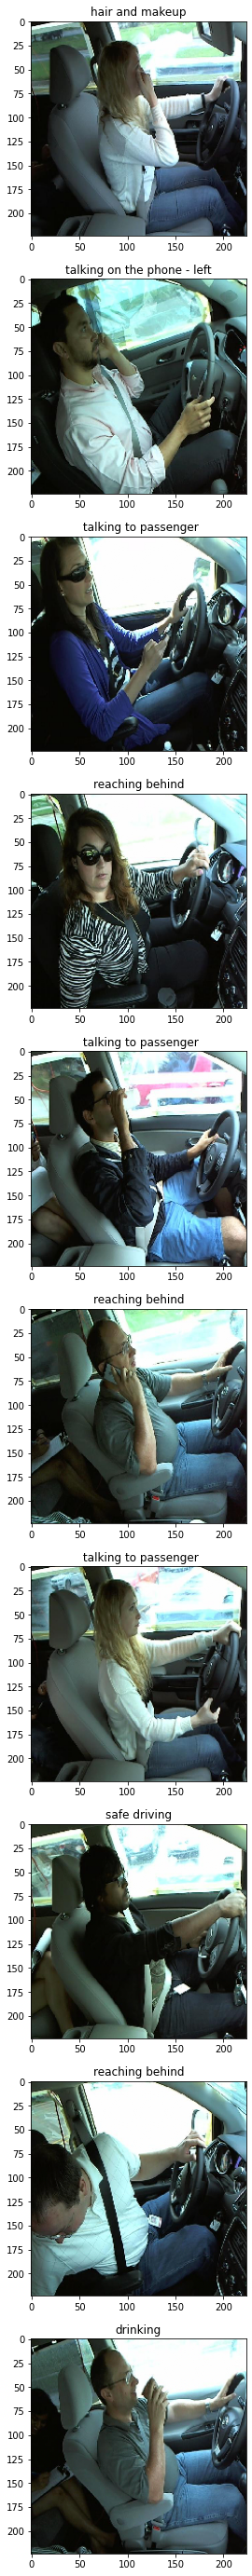

In [46]:
i = 0
fig, ax = plt.subplots(10, 1, figsize = (50,50))

for i in range(10):
    ax[i].imshow(test[i].squeeze())
    predicted_class = 'c'+str(np.where(prediction[i] == np.amax(prediction[i]))[0][0])
    ax[i].set_title(Classes[predicted_class])
    plt.show
    

In [23]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

NameError: ignored

In [24]:
len(test_set)

2492

In [25]:
test_set_1 = test_datagen.flow_from_directory('./Test',
                                            target_size = (224, 224),
                                            batch_size = 1,
                                            class_mode = 'categorical')

Found 79726 images belonging to 1 classes.


In [26]:
len(test_set_1)

79726

In [27]:
pred = model.predict_generator(test_set_1,steps=len(test_set_1),
  verbose=1
)

    1/79726 [..............................] - ETA: 2:47:48

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


79726/79726 [==============================] - 763s 10ms/step


In [28]:
pred

array([[1.6219382e-01, 1.8858580e-06, 5.9132393e-02, ..., 7.0233369e-04,
        4.7275545e-03, 2.8940964e-01],
       [2.3611772e-12, 7.4118693e-09, 2.1587738e-07, ..., 2.2352422e-03,
        5.9531060e-09, 1.3880439e-11],
       [9.9705148e-01, 2.2698807e-10, 3.5066725e-10, ..., 5.8148907e-14,
        2.3005315e-13, 2.9451766e-03],
       ...,
       [3.2018645e-05, 5.5330789e-09, 3.2891403e-08, ..., 7.6666417e-08,
        6.1382110e-08, 2.5607429e-03],
       [2.2044767e-06, 8.8735195e-03, 1.8657661e-04, ..., 9.8929870e-01,
        4.2443666e-05, 5.4176664e-04],
       [4.6934713e-02, 2.5746530e-02, 4.5933646e-01, ..., 2.3861822e-01,
        5.0021548e-02, 1.5594643e-01]], dtype=float32)

In [29]:
len(pred)

79726

In [30]:
import pandas as pd


In [31]:
df_pred = pd.DataFrame(pred)
df_pred

,0,1,2,3,4,5,6,7,8,9
0,1.621938e-01,1.885858e-06,5.913239e-02,2.857186e-01,1.980821e-01,3.067328e-05,1.088778e-06,7.023337e-04,4.727555e-03,2.894096e-01
1,2.361177e-12,7.411869e-09,2.158774e-07,1.515872e-14,3.882592e-09,4.628052e-15,9.977645e-01,2.235242e-03,5.953106e-09,1.388044e-11
2,9.970515e-01,2.269881e-10,3.506672e-10,4.144366e-13,3.350980e-06,1.243242e-10,1.070408e-13,5.814891e-14,2.300531e-13,2.945177e-03
3,4.465370e-09,1.132614e-09,9.999845e-01,2.198753e-09,7.006016e-08,4.996646e-10,1.059948e-06,7.010667e-08,1.423169e-05,4.175631e-08
4,1.270842e-04,1.016744e-03,6.059685e-07,4.295111e-04,3.573497e-05,1.489859e-10,9.973178e-07,9.323167e-01,6.421857e-02,1.853969e-03
...,...,...,...,...,...,...,...,...,...,...
79721,8.447969e-11,3.661710e-09,1.022166e-09,1.778562e-11,6.886677e-06,1.072371e-14,2.132931e-08,9.997573e-01,1.486346e-09,2.357371e-04
79722,1.991170e-08,2.993347e-10,9.952903e-01,4.029552e-12,1.734161e-05,3.985451e-07,9.057813e-04,2.025567e-03,1.414632e-05,1.746483e-03
79723,3.201864e-05,5.533079e-09,3.289140e-08,5.486488e-07,9.973717e-01,9.986862e-10,3.492010e-05,7.666642e-08,6.138211e-08,2.560743e-03
79724,2.204477e-06,8.873519e-03,1.865766e-04,1.486840e-06,3.981143e-08,6.251521e-08,1.053125e-03,9.892987e-01,4.244367e-05,5.417666e-04


In [32]:
df_pred.to_csv('DDC.csv',index=False)

In [50]:
df_list = pd.read_csv('/content/driver_imgs_list.csv',na_values='na')

In [51]:
df_list.head()

,subject,classname,img
0,p002,c0,img_44733.jpg
1,p002,c0,img_72999.jpg
2,p002,c0,img_25094.jpg
3,p002,c0,img_69092.jpg
4,p002,c0,img_92629.jpg


In [53]:
df_list.iloc[:,2].isna().sum()

0

In [55]:
df_pred['img'] = df_list.iloc[:,2]

In [58]:
df_pred.head(10)

,0,1,2,3,4,5,6,7,8,9,img
0,1.621938e-01,1.885858e-06,5.913239e-02,2.857186e-01,1.980821e-01,3.067328e-05,1.088778e-06,7.023337e-04,4.727555e-03,2.894096e-01,img_44733.jpg
1,2.361177e-12,7.411869e-09,2.158774e-07,1.515872e-14,3.882592e-09,4.628052e-15,9.977645e-01,2.235242e-03,5.953106e-09,1.388044e-11,img_72999.jpg
2,9.970515e-01,2.269881e-10,3.506672e-10,4.144366e-13,3.350980e-06,1.243242e-10,1.070408e-13,5.814891e-14,2.300531e-13,2.945177e-03,img_25094.jpg
3,4.465370e-09,1.132614e-09,9.999845e-01,2.198753e-09,7.006016e-08,4.996646e-10,1.059948e-06,7.010667e-08,1.423169e-05,4.175631e-08,img_69092.jpg
4,1.270842e-04,1.016744e-03,6.059685e-07,4.295111e-04,3.573497e-05,1.489859e-10,9.973178e-07,9.323167e-01,6.421857e-02,1.853969e-03,img_92629.jpg
5,1.850914e-11,2.536457e-14,1.839728e-08,1.898186e-15,1.002277e-07,1.016547e-11,4.733571e-13,9.999989e-01,4.384295e-10,9.464412e-07,img_3370.jpg
6,1.312504e-03,4.380365e-07,6.186782e-06,1.126486e-04,2.804178e-06,3.693213e-07,1.302721e-06,1.666836e-05,1.965967e-04,9.983505e-01,img_67639.jpg
7,3.323685e-06,6.134664e-02,1.549391e-01,6.133389e-05,4.245329e-06,2.697940e-07,7.077567e-01,4.497661e-02,6.023902e-05,3.085147e-02,img_58560.jpg
8,1.121284e-07,9.000064e-02,2.800887e-05,1.096738e-02,3.211648e-06,1.408245e-09,6.017940e-01,2.967135e-01,1.471733e-05,4.784347e-04,img_35779.jpg
9,1.669423e-07,2.433935e-07,2.457417e-04,3.125261e-09,4.771401e-06,2.851561e-08,2.170358e-05,7.081204e-06,9.930245e-01,6.695788e-03,img_10012.jpg


In [60]:
cols = list(df_pred.columns)
cols = [cols[-1]] + cols[:-1]
df_pred = df_pred[cols]

In [61]:
df_pred

,img,0,1,2,3,4,5,6,7,8,9
0,img_44733.jpg,1.621938e-01,1.885858e-06,5.913239e-02,2.857186e-01,1.980821e-01,3.067328e-05,1.088778e-06,7.023337e-04,4.727555e-03,2.894096e-01
1,img_72999.jpg,2.361177e-12,7.411869e-09,2.158774e-07,1.515872e-14,3.882592e-09,4.628052e-15,9.977645e-01,2.235242e-03,5.953106e-09,1.388044e-11
2,img_25094.jpg,9.970515e-01,2.269881e-10,3.506672e-10,4.144366e-13,3.350980e-06,1.243242e-10,1.070408e-13,5.814891e-14,2.300531e-13,2.945177e-03
3,img_69092.jpg,4.465370e-09,1.132614e-09,9.999845e-01,2.198753e-09,7.006016e-08,4.996646e-10,1.059948e-06,7.010667e-08,1.423169e-05,4.175631e-08
4,img_92629.jpg,1.270842e-04,1.016744e-03,6.059685e-07,4.295111e-04,3.573497e-05,1.489859e-10,9.973178e-07,9.323167e-01,6.421857e-02,1.853969e-03
...,...,...,...,...,...,...,...,...,...,...,...
79721,NaN,8.447969e-11,3.661710e-09,1.022166e-09,1.778562e-11,6.886677e-06,1.072371e-14,2.132931e-08,9.997573e-01,1.486346e-09,2.357371e-04
79722,NaN,1.991170e-08,2.993347e-10,9.952903e-01,4.029552e-12,1.734161e-05,3.985451e-07,9.057813e-04,2.025567e-03,1.414632e-05,1.746483e-03
79723,NaN,3.201864e-05,5.533079e-09,3.289140e-08,5.486488e-07,9.973717e-01,9.986862e-10,3.492010e-05,7.666642e-08,6.138211e-08,2.560743e-03
79724,NaN,2.204477e-06,8.873519e-03,1.865766e-04,1.486840e-06,3.981143e-08,6.251521e-08,1.053125e-03,9.892987e-01,4.244367e-05,5.417666e-04
